## 1.17 Neural network models (supervised)

> **Warning**: this implementation is for small-scale applications, not large scale. In particular, sklearn does not offer GPU support

### 1.17.1 Multi-layer Perceptron

A **multi-layer perceptron** (MLP) is a supervised learning algorithm that learns a function $f:R^{m}\rightarrow R^{o}$ by training on a dataset where $m$ is the number of input dimensions and $o$ is the output dimensions. Given a feature matrix $X$ and target matrix $y$ it can learn a non-linear function approximator for either classification or regression.

It differs from logistic regression as there can be hidden layers between the input and output layers

Advantages of MLP:
* capability to learn non-linear models
* capability to learn models in real-time

Disadvantages of MLP:
* MLP with hidden layers have a non-convex loss function where there exists more than one local minimum, so different random weight initializations can lead to different validation accuracy
* requires hyperparameters like number of hidden neurons, layer, iterations
* sensitive to feature scaling

### 1.17.2 Classification

Example:

In [1]:
from sklearn.neural_network import MLPClassifier

In [2]:
X = [[0,0], [1,1]]
y = [0,1]

In [3]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5,2), random_state=1)
clf.fit(X,y)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

In [5]:
clf.predict([[2,2],[-1,-2]])

array([1, 0])

MLP can fit a non-linear model to the training data, and `clf.coefs_` contains the weight matrices that constitute the model parameters:

In [6]:
clf.coefs_

[array([[-0.14196276, -0.02104562, -0.85522848, -3.51355396, -0.60434709],
        [-0.69744683, -0.9347486 , -0.26422217, -3.35199017,  0.06640954]]),
 array([[ 0.29164405, -0.14147894],
        [ 2.39665167, -0.6152434 ],
        [-0.51650256,  0.51452834],
        [ 4.0186541 , -0.31920293],
        [ 0.32903482,  0.64394475]]),
 array([[-4.53025854],
        [-0.86285329]])]

In [8]:
[coef.shape for coef in clf.coefs_]

[(2, 5), (5, 2), (2, 1)]

MLP trains using **back propagation**; specifically, it trains using some form of gradient descent and the gradients are calculated using back propagation. For classification it minimizes the **cross-entropy** loss function, giving a vector of probability estimates $P(y|x)$ for each sample $x$:

In [9]:
clf.predict_proba([[2,2],[1,2]])

array([[1.96718015e-04, 9.99803282e-01],
       [1.96718015e-04, 9.99803282e-01]])

`MLPClassifier` supports multi-class classification using `Softmax` as the output function. It also supports multi-label classification where a sample can belong to more than one class

In [11]:
X = [[0,0],[1,1]]
y = [[0,1], [1,1]]

clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(15,), random_state=1)
clf.fit(X,y)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(15,), random_state=1,
              solver='lbfgs')

In [12]:
clf.predict([[1,2]])

array([[1, 1]])

In [13]:
clf.predict([[0,0]])

array([[0, 1]])

###### Example - Compare Stochastic learning strategies for MLPClassifier
https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_training_curves.html#sphx-glr-auto-examples-neural-networks-plot-mlp-training-curves-py

###### Example - Visualization of MLP weights on MNIST
https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mnist_filters.html#sphx-glr-auto-examples-neural-networks-plot-mnist-filters-py

In [14]:
import warnings
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml
from sklearn.exceptions import ConvergenceWarning
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

In [15]:
#load data from openml
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
X = X / 255.0

#split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.7)

In [41]:
mlp = MLPClassifier(hidden_layer_sizes=(40,), max_iter=12, alpha=1e-4,
                    solver='sgd', verbose=10, random_state=1, learning_rate_init=0.2)

#example won't converge due to resource usage constraints
#so catch the warning and ignore it
with warnings.catch_warnings():
    warnings.filterwarnings('ignore', category=ConvergenceWarning, module='sklearn')
    mlp.fit(X_train, y_train)
    
print(f"Training score: {mlp.score(X_train, y_train)}")
print(f'Test score: {mlp.score(X_test, y_test)}')

Iteration 1, loss = 0.44139186
Iteration 2, loss = 0.19174891
Iteration 3, loss = 0.13983521
Iteration 4, loss = 0.11378556
Iteration 5, loss = 0.09443967
Iteration 6, loss = 0.07846529
Iteration 7, loss = 0.06506307
Iteration 8, loss = 0.05534985
Iteration 9, loss = 0.04751107
Iteration 10, loss = 0.03916272
Iteration 11, loss = 0.03614981
Iteration 12, loss = 0.03026311
Training score: 0.991904761904762
Test score: 0.9536734693877551


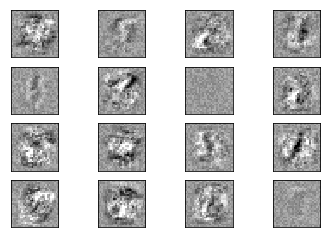

In [42]:
#COPYPASTA
fig, axes = plt.subplots(4, 4)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=0.5 * vmin, vmax=0.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

### 1.17.3 Regression

`MLPRegressor` also uses a multi-layer perceptron (MLP) that trains using backpropagation with no activation function in the output layer (*i.e.* using the identity function as an activation function). It uses squared error as the loss function and the output is a set of continuous values

`MLPRegressor` also supports multi-output regression, where a sample can have more than one target

### 1.17.4 Regularization

Both `MLPClassifier` and `MLPRegressor` use the parameter `alpha` for L2 regularization to help avoid overfitting by penalizing weights with large magnitudes

###### Example - Varying regularization in Multi-layer Perceptron
https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html#sphx-glr-auto-examples-neural-networks-plot-mlp-alpha-py

### 1.17.5 Algorithms
### 1.17.6 Complexity
### 1.17.7 Mathematical formulation

### 1.17.8 Tips on Practical Use

* MLP is sensitive to feature scaling, so it is **highly recommended to scale your data** and note that you must apply the same scaling to both the training and test sets. You can use `StandardScaler`
    * An alternative and recommended approach is using `StandardScaler` in a `Pipeline`
* Finding a reasonable regularization parameter $\alpha$ is best done using `GridSearchCV`
* Empirically, `L-BFGS` converges better and faster on small datasets. 
    * `Adam` is better for larger datasets
    * `SGD` with momentum performs better than both if the learning rate is correctly tuned

#### 1.17.9 More control with warm_start

Using `warm_start=True` with `max_iter=1` and iterating yourself can give you more control over stopping criteria or learning rate in SGD